In [9]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [10]:
import tensorflow.keras as keras

In [11]:
# Import the dataset. It has 28 by 28 resolution hand-written images 0 through 9. 
mnist = tf.keras.datasets.mnist

In [12]:
# Splitting the dataset int training and testing datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [13]:
import matplotlib.pyplot as plt

In [14]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

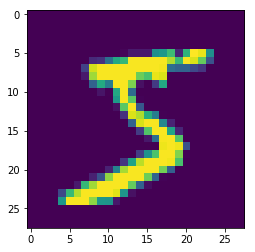

In [15]:
plt.imshow(x_train[0])
plt.show()

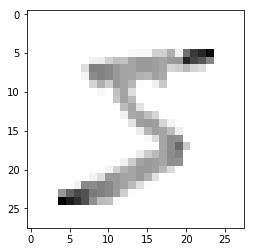

In [18]:
# We could also make it black and white.

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

## Now we are goignt o normalize the data. Each "pixel" is a feature, and each feature currently ranges from 0 to 255. 
## So, we normalize to 0 to 1.

In [17]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [19]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
# Next we will build the sequential model i.e. we will feed forward. 

model = tf.keras.models.Sequential()

In [21]:
# The imput layer was flat. 
# So, we need to take this 28x28 image, and make it a flat 1x784. 
# The first layer is the input layer.
# Then we will do the hidden layer -- 2 hidden layers. 
# We will do a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. 

model.add(tf.keras.layers.Flatten())
# The dense layer will have 128 units
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# We will another idential layer, the second hidden layer. The activation function is rectified linear.  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#Then we will have our output layer -- the final layer with 10 nodes. 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))



W0816 10:20:21.758205 13152 deprecation.py:506] From C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
# Compiling the model. Loss is the degree of error

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Then we fit the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2658 - acc: 0.9224
Epoch 2/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1060 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0738 - acc: 0.9769


In [23]:
# This was using the in-sample data. 
# Now we test on out-of-sample data (data we didn't use to train the model) i.e. the test dataset

val_loss, val_acc = model.evaluate(x_test, y_test)  # Evaluate the out of sample data with model
print(val_loss)  # Model's loss (error)
print(val_acc)  # mModel's accuracy

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0946 - acc: 0.9702
0.09462004132922738
0.9702


In [24]:
# Saving the model

model.save('epic_num_reader.model')

In [25]:
#Reloading the model
new_model = tf.keras.models.load_model('epic_num_reader.model')

W0816 10:31:53.462049 13152 deprecation.py:506] From C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 10:31:53.464005 13152 deprecation.py:506] From C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 10:31:53.647513 13152 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a fr

In [26]:
# Making predictions with the model
predictions = new_model.predict(x_test)
print(predictions)

[[1.0506592e-09 9.5590700e-09 1.2717314e-06 ... 9.9999344e-01
  6.8986500e-10 1.5289261e-07]
 [1.9787447e-07 4.1890815e-02 9.5802599e-01 ... 2.7363819e-07
  1.3499601e-06 6.7456720e-09]
 [3.4926524e-07 9.9993265e-01 4.2094712e-06 ... 1.9986543e-05
  2.8350663e-05 4.9229056e-06]
 ...
 [2.1574220e-08 1.0160711e-06 1.1894577e-07 ... 9.5638261e-06
  5.7375046e-06 2.2952832e-04]
 [2.5191801e-07 9.9246688e-07 6.2808105e-09 ... 1.1010443e-06
  5.5007031e-04 3.6033881e-10]
 [5.9922762e-08 2.4490582e-08 1.6677816e-09 ... 2.6917396e-12
  9.0399466e-09 1.1501504e-10]]


In [27]:
# These are probability distributions. 
# We can get the actual number by:

import numpy as np
print(np.argmax(predictions[0]))

7


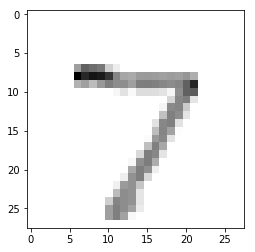

In [28]:
# let's look at the input:

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

# The actual number was indeed 7.